*In this notebook, I've tried to document my journey of solving a real life problem. This problem is inspired by IBM online course on edx.org. As a beginner, there are codes that I'm unfamiliar with; source of codes has been commented in each cell.*

# Problem Statement
The people of New Yorker use the 311 system to report complaints about the non-emergency problems to local authorities. The Department of Housing Preservation and Development of New York City is the agency that processes 311 complaints that are related to housing and buildings. In the last few years, the number of 311 complaints coming to the Department of Housing Preservation and Development has increased significantly. Thus, our tasks would be:<br>
1. Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first? <br>
2. Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1? <br>
3. Does the Complaint Type that you identified in response to question 1 have an obvious relationship with any particular characteristic or characteristics of the houses or buildings? <br>
4. Can a predictive model be built for a future prediction of the possibility of complaints of the type that you have identified in response to Question 1?

# The Data
## NYC 311 Complaint Dataset
We are using NYC 311 Complaint Dataset that can be downloaded from: <br>
https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status <br>
The downloaded data will have complaints submitted between 2010 and 2020.<br>

## NYC PLUTO Dataset
PLUTO dataset for housing characteristics.<br>
The URL to download the PLUTO dataset zip file: <br>
https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_18v1.zip.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['figure.figsize'] = [12,8]

In [2]:
df= pd.read_csv(r'C:\Users\User\Downloads/fhrw-4uyv.csv')

# Data Exploration <br>
This step includes removing columns we do not need, checking missing values and so on.

In [3]:
df.head(5)

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2020-10-04T18:32:26.000,47780109,FLOORING/STAIRS,11211.0,601 METROPOLITAN AVENUE,METROPOLITAN AVENUE,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.714123,-73.948835,2020-10-07T11:27:14.000,RESIDENTIAL BUILDING,Closed
1,2020-10-04T08:34:10.000,47780207,APPLIANCE,11229.0,2113 AVENUE V,AVENUE V,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a co...,BROOKLYN,40.597410,-73.949756,2020-10-07T11:35:29.000,RESIDENTIAL BUILDING,Closed
2,2020-10-04T16:47:24.000,47780238,HEAT/HOT WATER,10469.0,2561 BRONXWOOD AVENUE,BRONXWOOD AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.863994,-73.861626,2020-10-07T17:46:29.000,RESIDENTIAL BUILDING,Closed
3,2020-10-04T16:16:15.000,47780255,HEAT/HOT WATER,11212.0,465 EAST 91 STREET,EAST 91 STREET,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.654741,-73.920791,2020-10-07T10:58:46.000,RESIDENTIAL BUILDING,Closed
4,2020-10-04T08:25:06.000,47780257,HEAT/HOT WATER,11229.0,2113 AVENUE V,AVENUE V,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.597410,-73.949756,2020-10-07T02:05:45.000,RESIDENTIAL BUILDING,Closed


## Data Dictionary:
Can be retrieved from: <br>
https://data.cityofnewyork.us/Social-Services/NYC-311-SR-CB05-040714/v83a-kb5d <br>
**created_date**: Date SR was created. <br>
**unique_key**: Unique identifier of a Service Request (SR) in the open data set. <br>
**complaint_type**: This is the first level of a hierarchy identifying the topic of the incident or condition. Complaint Type may have a corresponding Descriptor (below) or may stand alone. <br>
**incident_zip**: Incident location zip code, provided by geo validation. <br>
**incident_address**: House number of incident address provided by submitter. <br>
**street_name**: Street name of incident address provided by the submitter. <br>
**address_type**: Type of incident location information available. <br>
**city**: City of the incident location provided by geovalidation. <br>
**resolution_description**: Describes the last action taken on the SR by the responding agency. May describe next or future steps. <br>
**borough**: Provided by the submitter and confirmed by geovalidation. <br>
**latitude**: Geo based Lat of the incident location. <br>
**longitude**: Geo based Long of the incident location. <br>
**closed_date**: Date SR was closed by responding agency. <br>
**location_type**: Describes the type of location used in the address information. <br>
**status**: Status of SR submitted. <br>

In [4]:
df.shape

(6372943, 15)

In [5]:
df.isnull().sum()

created_date                    0
unique_key                      0
complaint_type                  0
incident_zip                80768
incident_address            52831
street_name                 52831
address_type                84752
city                        80340
resolution_description       7816
borough                         0
latitude                  2830559
longitude                 2830559
closed_date                141649
location_type               52830
status                          0
dtype: int64

Since most columns(eg. *created_date, complaint_type, borough, status*) that we are interested in have no null values, no changes will be made on the other null values. Now, we proceed to **Question 1**.

# Question 1 - What Is the Top Complaint Type? <br>
This question can be answered by: <br>
1. comparing the total cases amount of each complaint type. <br>
2. comparing the trend of each complaint type in previous year <br>
    (eg. to confirm the most complaint type by total cases (1.) is the same as the most complaint type in year 2020.)

## 1.1 Top Complaints by Total Cases Amount

In [6]:
df_complaint = df.copy()

#Calculate total cases of all complaint types
df_complaint = df_complaint['complaint_type'].value_counts()

#Sort in descending orders to find top 5 complaint types
df_complaint = df_complaint.sort_values(ascending=False)
df_complaint_5 = df_complaint.head(5)

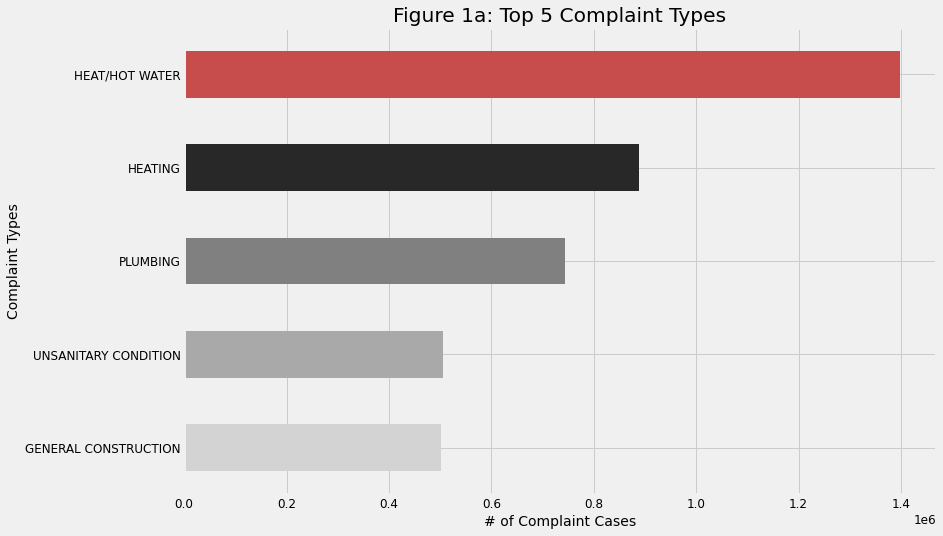

In [7]:
#https://stackoverflow.com/questions/3832809/how-to-change-the-color-of-a-single-bar-if-condition-is-true-matplotlib
#clrs = ['#808080' if (x < max(df_complaint_5.values)) else '#c74d4c' for x in df_complaint_5.values ]
#https://stackoverflow.com/questions/34076177/matplotlib-horizontal-bar-chart-barh-is-upside-down
fig, ax = plt.subplots()
clrs = ['#c74d4c', '#282828','#808080', '#A9A9A9',  '#D3D3D3']
clrs_r = ['#C0C0C0', '#A9A9A9', '#808080','#282828','#c74d4c']
ax = df_complaint_5.plot(kind='barh', color = clrs)
ax.invert_yaxis()
plt.title('Figure 1a: Top 5 Complaint Types')
plt.xlabel('# of Complaint Cases')
plt.ylabel('Complaint Types')
plt.show()

#### 1.1 The **Major Findings** are: <br>
1. Top 3 Complaint Types are **HEAT/HOT WATER**, **HEATING** and **PLUMBING**; <br>
2. The amount of total **HEAT/HOT WATER** complaint cases is almost *double* of the amount of **HEATING** complaint case. <br>

## 1.2 Top Complaints by Recent Year Trend

In [8]:
#Function: Indexing dataset with timeseries
def timeseries(df_, cond):
    df_ = df.copy()
    df_ = df_.loc[df_['complaint_type'] ==  cond]
    df_ = df_.sort_values('created_date')
    df_ = df_.set_index('created_date')
    df_.index = pd.to_datetime(df_.index) 
    df_ = df_.resample('MS').count() 
    df_ = df_[['complaint_type']]
    df_ = df_.rename(columns={'complaint_type': cond})
    df_ = df_.reset_index()
    return df_

In [9]:
#timeseries dataset for heat/hot water
df_hhw = timeseries(df, 'HEAT/HOT WATER')
#timeseries dataset for heating
df_h = timeseries(df, 'HEATING')
#timeseries dataset for plumbing
df_p = timeseries(df, 'PLUMBING')
#timeseries dataset for Unsanitary Condition
df_uc = timeseries(df, 'UNSANITARY CONDITION')
#timeseries dataset for General Construction
df_gc = timeseries(df, 'GENERAL CONSTRUCTION')

In [10]:
#get full timeseries from origina ldataset for plotting the trends
df_time = df[['created_date']].sort_values('created_date')
df_time = pd.to_datetime(df_time['created_date'])
df_time = df_time.to_frame()
df_time = df_time.set_index('created_date')
df_time = df_time.resample('MS').count()
df_time = df_time.reset_index()

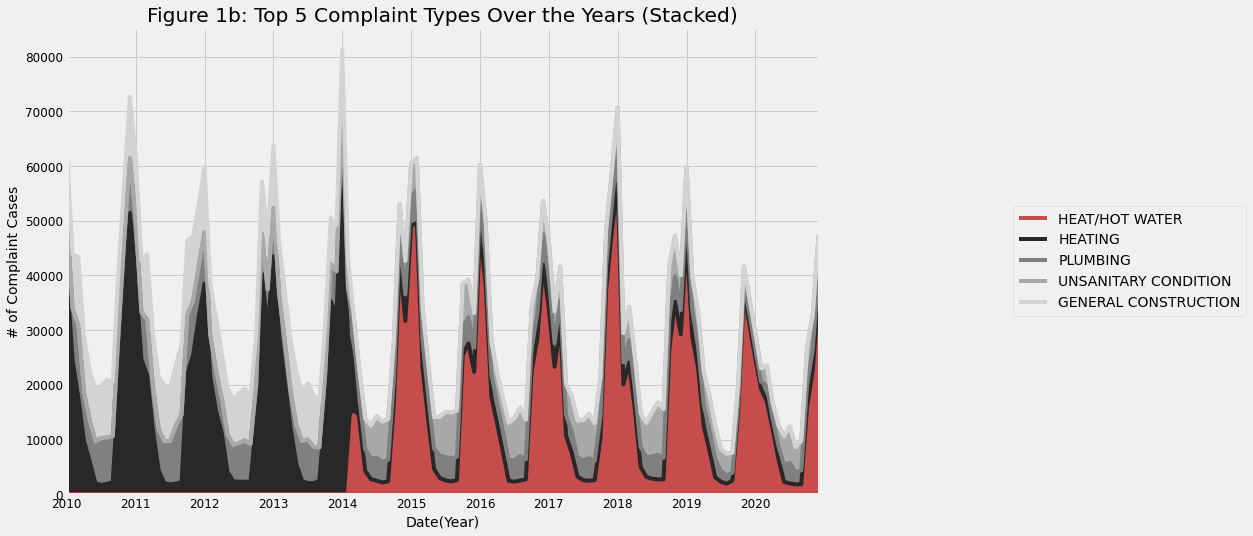

In [11]:
#Merge dataset with timeseries dataset above
df_y = pd.merge(df_time, df_hhw, how='outer')
df_y = pd.merge(df_y, df_h, how='outer')
df_y = pd.merge(df_y, df_p, how='outer')
df_y = pd.merge(df_y, df_uc, how='outer')
df_y = pd.merge(df_y, df_gc, how='outer')


df_y = df_y.set_index('created_date')
df_y = df_y.replace(np.nan, 0)

df_y.plot(kind='area', color =clrs)
plt.legend(labels = df_y.columns, loc='center left', bbox_to_anchor = (1.25, 0.5), ncol=1)
plt.title('Figure 1b: Top 5 Complaint Types Over the Years (Stacked)')
plt.ylabel('# of Complaint Cases')
plt.xlabel('Date(Year)')
plt.show()


#### 1.2 The **Major Findings** are: <br>
*Please noted that Figure 1b is a stacked area plot.*
1. **HEAT/HOT WATER** complaint type, since the end of year 2014, when it was first recorded, is the most complaint type. <br>
2. **HEATING** complaint type, was the most complaint type from 2011 through 2014, but its record stopped in the year 2014, which is already 7 years ago. <br>
3. The amount of other complaint types (eg. **PLUMBING, UNSANITARY CONDTION, GENERAL CONSTRUCTION**) are relatively insignificant compare to **HEAT/HOT WATER**.
4. There are some distinguishable pattern in **HEAT/HOT WATER** trend; the # of cases spikes at the end of the years and continues to the beginning of the preceeding year and goes down in the middle of the year. 

### The Answer to Question 1: <br>
Considering both the total amount of complaints made and the trend in recent years, Department of Housing Preservation and Development of New York City (HPD) should focus on **HEAT/HOT WATER**. <br> 
A quick research on Google can tell HPD has already focusing on this issue since 2018 due to the increasing complaints. <br>
HPD announced **"heat season"** begins on October 1st every year continues to May 31st the preceeding year. During this season, all residential building owners are required to maintain indoor temperatures at 68 degrees when outdoor temperatures fall below 55 degrees during the day. Indoor temperatures must also be a minimum of 62 degrees overnight, regardless of outdoor temperatures. Building owners are legally required to provide hot water at 120 degrees year-round. Also, financial assistance for owner-occupied properties are also available. <br> More information can be found: 
https://www1.nyc.gov/site/hpd/news/042-20/hpd-start-the-2020-2021-heat-season-new-york-city#/0

# Question 2 - What Areas Should the Agency Focus On? 
*(eg. 2.1 boroughs, 2.2 ZIP codes, or 2.3 street)* <br>
This question can be answered by: <br>
1. comparing the total cases amount of each borough, ZIP codes, or street
2. comparing the trend of each areas in previous year <br>
    (eg. the most affected area by total cases might not be the same as the most affected area recently)

In [12]:
import folium
import json
from folium import plugins

A quick glance on where *HEAT/HOT WATER* complaints comes from, on map.

In [13]:
#Function: Filter dataset for different areas (eg. borough, zip, street)
def filter_df(df_, cond):
    df_ = df.copy()
    df_ = df_[[cond,'complaint_type']]
    df_ = df_.loc[df['complaint_type']=='HEAT/HOT WATER']
    df_ = df_[cond].value_counts()
    return df_

In [14]:
#dataset filter by zip
df_zip = filter_df(df, 'incident_zip')

#format dataset for folium map
df_zip = df_zip.to_frame()
df_zip.reset_index(inplace=True)
df_zip.rename(columns={'index':'zipcode','incident_zip':'NumCases'}, inplace=True)

df_zip['zipcode'] = df_zip['zipcode'].astype(int) #to make zip become integer (remove .0)
df_zip['zipcode'] = df_zip['zipcode'].astype(str) #to str so that it matches  key_on='feature.properties.postalcode'

In [15]:
#https://towardsdatascience.com/making-3-easy-maps-with-python-fb7dfb1036
#https://jsspina.carto.com/tables/nyc_zip_code_tabulation_areas_polygons/public/map for geojson file


fig4 = folium.Map(location=[40.7128  ,-74.0060],  zoom_start=11, control_scale=True)

fig4.choropleth(geo_data='nyZips.geojson', data=df_zip, columns=['zipcode', 'NumCases'], \
                 key_on='feature.properties.postalcode', fill_color='RdGy_r', fill_opacity=0.5)

fig4

It is obvious that most red-shaded region (more complaint cases) situated in **Bronx** though some of the parts in **Brooklyn** are also shaded red. 

## 2.1 Borough

In [16]:
#dataset filter by borough
df_borough = filter_df(df, 'borough')

In [17]:
#function for timeseries dataset of borough
def timeseries_borough(df_, borough_name):
    df_ = df.copy()
    df_ = df_.loc[df_['complaint_type'] == 'HEAT/HOT WATER']
    df_ = df_[['created_date', 'borough']]
    df_ = df_.loc[df_['borough'] == borough_name]
    df_ = df_.sort_values('created_date')
    df_ = df_.set_index('created_date')
    df_.index = pd.to_datetime(df_.index)
    df_ = df_.resample('MS').count()
    df_ = df_.rename(columns={'borough': borough_name})
    df_ = df_.reset_index()
    return df_

In [18]:
#timeseries df for BRONX
df_BRONX = timeseries_borough(df, 'BRONX')
#timeseries df for BROOKLYN
df_BROOKLYN = timeseries_borough(df, 'BROOKLYN')
#timeseries df for MANHATTAN
df_MANHATTAN = timeseries_borough(df, 'MANHATTAN')
#timeseries df for QUEENS
df_QUEENS = timeseries_borough(df, 'QUEENS')
#timeseries df for STATEN ISLAND
df_STATEN_ISLAND = timeseries_borough(df, 'STATEN ISLAND')

In [19]:
#Merge dataset with timeseries dataset above


df_merge_borough = pd.merge(df_BRONX, df_BROOKLYN, how='outer')
df_merge_borough = pd.merge(df_merge_borough, df_MANHATTAN, how='outer')
df_merge_borough = pd.merge(df_merge_borough, df_QUEENS, how='outer')
df_merge_borough = pd.merge(df_merge_borough, df_STATEN_ISLAND, how='outer')


df_merge_borough = df_merge_borough.set_index('created_date')

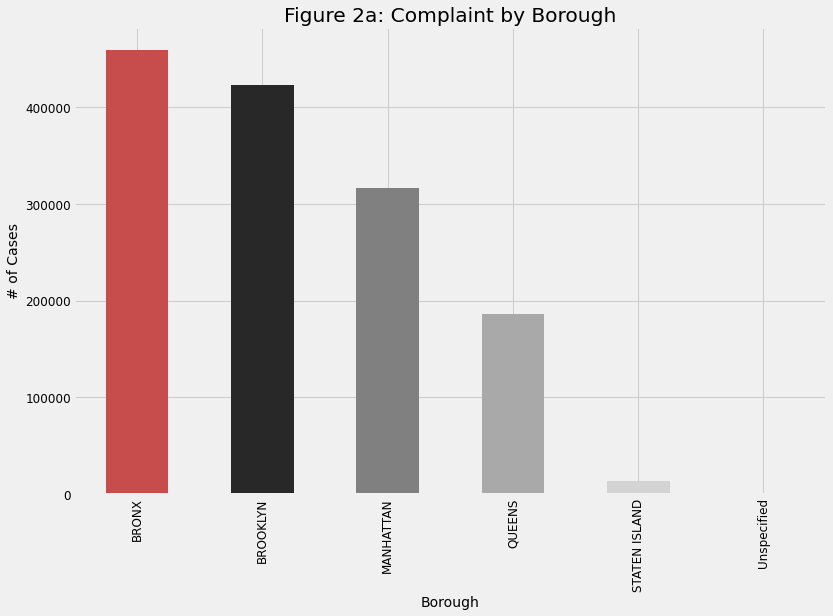

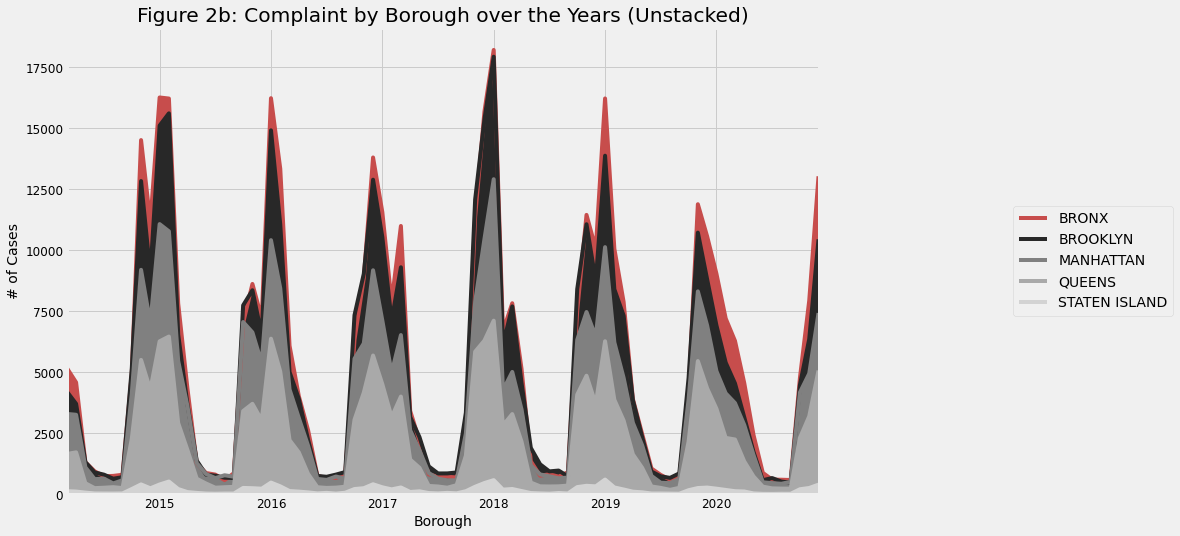

In [20]:
df_borough.plot(kind='bar', color = clrs)
plt.title('Figure 2a: Complaint by Borough')
plt.xlabel('Borough')
plt.ylabel('# of Cases')
plt.show()


df_merge_borough.plot(kind='area', color =clrs, alpha = 1, stacked = False)
plt.legend(labels = df_merge_borough.columns, loc='center left', bbox_to_anchor = (1.25, 0.5), ncol=1)
plt.title('Figure 2b: Complaint by Borough over the Years (Unstacked)')
plt.xlabel('Borough')
plt.ylabel('# of Cases')
plt.show()

#### 2.1a The **Major Findings** are: <br>
1. Most complaint cases came from **BRONX** and **BROOKLYN**. <br>

#### 2.1b The **Major Findings** are: <br>
1. **BRONX** (colored in red) has the highest # of cases most of the time. <br>
2. Eventually every year, people in **BRONX** complaint much more times compare to people in **BROOKLYN**. 

In [21]:
Complaint = df_merge_borough.copy()
Complaint = Complaint.resample('Y').sum()
Complaint 

,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
created_date,,,,,
2014-12-31,44925,39306,30270,16955,1311
2015-12-31,71865,67876,54259,29558,2148
2016-12-31,74201,69572,51771,30218,2197
2017-12-31,68718,66984,46529,29217,2073
2018-12-31,71454,70271,49985,29831,2293
2019-12-31,70328,63291,47490,28874,2091
2020-12-31,57911,45281,35811,21749,1629


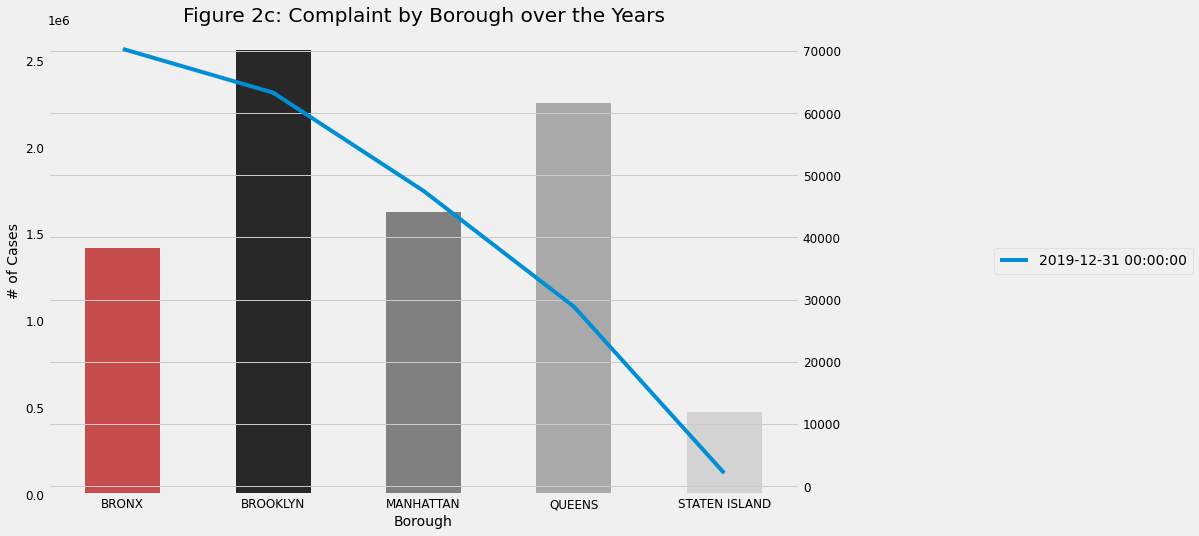

In [22]:
#https://www.citypopulation.de/en/usa/newyorkcity/
fig, ax = plt.subplots()

Population = pd.Series(index = ['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'], data = [1418207, 2559903, 1628706, 2253858, 476143])
Population.transpose().plot.bar(color=clrs, ax=ax)
ax.set_xlabel('Borough')
ax.set_ylabel('# of Cases')


Complaint.loc['2019-12-31'].plot(secondary_y=True, ax=ax)
plt.legend(loc='center left', bbox_to_anchor = (1.25, 0.5), ncol=1)
plt.title('Figure 2c: Complaint by Borough over the Years')
plt.show()


*The estimated population  is for the year 2019, the # of complaint case is also calculated for the year 2019.*
#### 2.1c The **Major Findings** are: <br>
1. **BRONX** (the red bar) is the forth populated borough (approximately 1.4 million population) but people living here lodged the most complaints (the blue line), 700,000. 

## 2.2 Zip <br>
Continued from 2.1, **BRONX** should be the main focus at the time. Moving forward in **2.2** finding the **zip codes** to be focused on, the dataset will be filtered and only focus on: **BRONX** and **Heat Season** . <br>
As Announced by HPD, *Heat Season* begins on 1st October each year and continues through  May 31st on the preceeding year.<br>

In [23]:
def by_year(data_year, start, end, year):
    data_year = df.copy()
    data_year = data_year.sort_values('created_date')
    mask = (data_year['created_date'] <=  end) & (data_year['created_date'] >=  start) & (data_year['complaint_type']=='HEAT/HOT WATER') & (data_year['borough'] =='BRONX')
    data_year = data_year.loc[mask]
    data_year = data_year['incident_zip'].value_counts()
    data_year = data_year.to_frame()
    data_year = data_year.reset_index()
    data_year = data_year.rename(columns={'incident_zip': year, 'index': 'incident_zip'})
    data_year = data_year.sort_values('incident_zip')
    return data_year

heatseason2020 = by_year(df, '2020-10-01', '2021-05-31', '2020 - 2021 Heat Season')
heatseason2019 = by_year(df, '2019-10-01', '2020-05-31', '2019 - 2020 Heat Season')
heatseason2018 = by_year(df, '2018-10-01', '2019-05-31', '2018 - 2019 Heat Season')
heatseason2017 = by_year(df, '2017-10-01', '2018-05-31', '2017 - 2018 Heat Season')

In [24]:
df_merge_zip = pd.merge(heatseason2017, heatseason2018, how='outer')
df_merge_zip = pd.merge(df_merge_zip, heatseason2019, how='outer')
df_merge_zip = pd.merge(df_merge_zip, heatseason2020, how='outer')
df_merge_zip = df_merge_zip.set_index('incident_zip')

In [25]:
df_merge_zip.describe()

,2017 - 2018 Heat Season,2018 - 2019 Heat Season,2019 - 2020 Heat Season,2020 - 2021 Heat Season
count,25.000000,25.000000,25.000000,25.00000
mean,2757.000000,2707.520000,2242.240000,1029.60000
std,2111.594678,2042.627885,1771.725413,795.91839
min,45.000000,43.000000,19.000000,32.00000
25%,849.000000,1102.000000,1071.000000,334.00000
50%,2480.000000,2413.000000,2029.000000,883.00000
75%,4597.000000,4212.000000,3528.000000,1633.00000
max,6772.000000,6463.000000,6403.000000,2349.00000


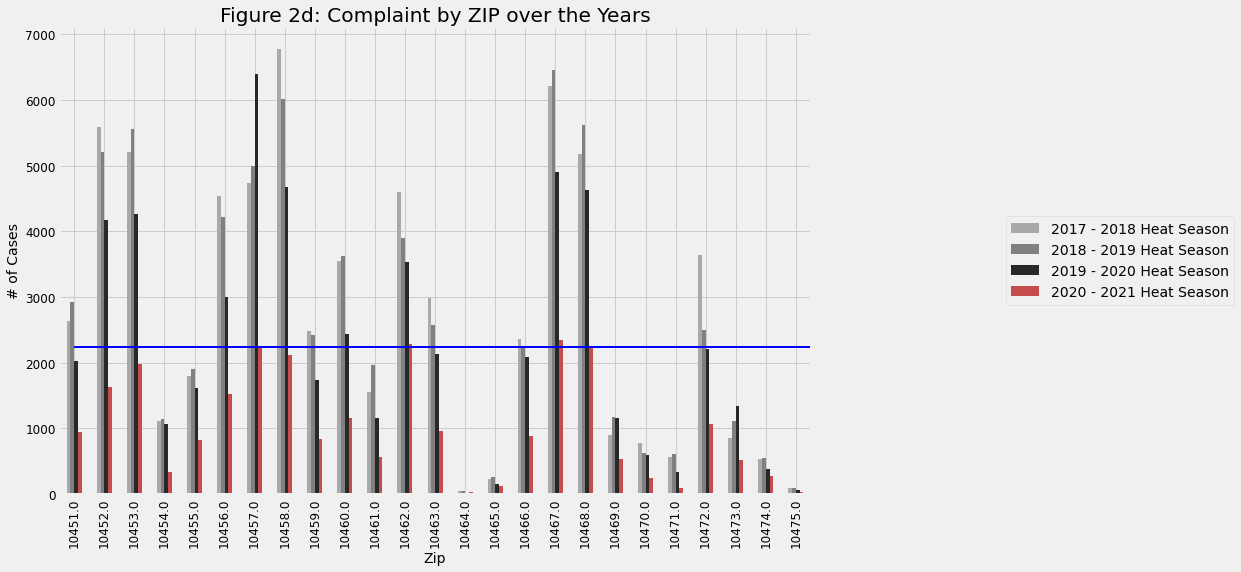

In [26]:
df_merge_zip.plot.bar(color=clrs_r[1:5])
plt.legend(labels = df_merge_zip.columns, loc='center left', bbox_to_anchor = (1.25, 0.5), ncol=1)
plt.plot([2242, 0],[2242, 2242], 'b-', lw=2, label='mean')
plt.title('Figure 2d: Complaint by ZIP over the Years')
plt.xlabel('Zip')
plt.ylabel('# of Cases')
plt.show()

#### 2.2 The **Major Findings** are: <br>
1. Most of zip codes lodge decreasing complaints over the years except (**10457**). <br>
2. Some of the zip codes lodge relatively less amount of complaints. <br>
3. Number of Cases in 5 zip codes (**10457, 10458, 10462, 10467, 10468**) currently (at 31st December 2021) are already passing the mean of total cases in 2019-2020 Heat Season, **2242**.  <br>
4. By Comparing the number of cases from different zip codes, **10457, 10458, 10462, 10467, 10468**  are also the Top 5 zip codes that complaint most. <br>
Summing up all the information above, also knowing that heat season ends on 31st May 2021, **10457, 10458, 10462, 10467, 10468** should be the main focus. 

## 2.2 Street
Focusing on **10457, 10458, 10462, 10467, 10468**, the data will then be filtered with the mentioned zip codes.

In [27]:
df.columns

Index(['created_date', 'unique_key', 'complaint_type', 'incident_zip',
       'incident_address', 'street_name', 'address_type', 'city',
       'resolution_description', 'borough', 'latitude', 'longitude',
       'closed_date', 'location_type', 'status'],
      dtype='object')

In [28]:
#zip filtered dataset
def by_year(data_year, start, end, year):
    data_year = df.copy()
    data_year = data_year.dropna(subset=['incident_zip'], axis=0)
    data_year = data_year.sort_values('created_date')
    mask_1 = (data_year['created_date'] <=  end) & (data_year['created_date'] >=  start) & (data_year['complaint_type']=='HEAT/HOT WATER') & (data_year['borough'] =='BRONX')
    data_year = data_year.loc[mask_1]
    data_year['incident_zip'] = data_year['incident_zip'].astype('int')
    mask_2 = (data_year['incident_zip'] == 10457) | (data_year['incident_zip'] == 10458) |  (data_year['incident_zip'] == 10462) | (data_year['incident_zip'] == 10467)\
    & (data_year['incident_zip'] == 10468)
    data_year = data_year.loc[mask_2]
    data_year = data_year['street_name'].value_counts()
    data_year = data_year.to_frame()
    data_year = data_year.reset_index()
    data_year = data_year.rename(columns={'street_name': year, 'index': 'street_name'})
    return data_year

heatseason2020_street = by_year(df, '2020-10-01', '2021-05-31', '2020 - 2021 Heat Season')
heatseason2019_street = by_year(df, '2019-10-01', '2020-05-31', '2019 - 2020 Heat Season')
heatseason2018_street = by_year(df, '2018-10-01', '2019-05-31', '2018 - 2019 Heat Season')
heatseason2017_street = by_year(df, '2017-10-01', '2018-05-31', '2017 - 2018 Heat Season')

In [29]:
df_merge_street = pd.merge(heatseason2017_street, heatseason2018_street, how='outer')
df_merge_street = pd.merge(df_merge_street, heatseason2019_street, how='outer')
df_merge_street = pd.merge(df_merge_street, heatseason2020_street, how='outer')
df_merge_street.head(5)

,street_name,2017 - 2018 Heat Season,2018 - 2019 Heat Season,2019 - 2020 Heat Season,2020 - 2021 Heat Season
0,EAST TREMONT AVENUE,1254.0,108.0,246.0,275.0
1,GRAND CONCOURSE,1211.0,1229.0,1137.0,618.0
2,BEDFORD PARK BOULEVARD,566.0,598.0,32.0,45.0
3,WASHINGTON AVENUE,563.0,326.0,164.0,87.0
4,PERRY AVENUE,544.0,344.0,176.0,12.0


In [30]:
df_merge_street['sum'] = df_merge_street.sum(axis=1)
df_merge_street = df_merge_street.set_index('street_name')
df_merge_street = df_merge_street.sort_values('2020 - 2021 Heat Season', ascending=False)
df_merge_street = df_merge_street.head(10)

In [31]:
df_merge_street

,2017 - 2018 Heat Season,2018 - 2019 Heat Season,2019 - 2020 Heat Season,2020 - 2021 Heat Season,sum
street_name,,,,,
TIEBOUT AVENUE,534.0,627.0,3270.0,787.0,5218.0
GRAND CONCOURSE,1211.0,1229.0,1137.0,618.0,4195.0
BRONXDALE AVENUE,521.0,793.0,990.0,425.0,2729.0
EAST TREMONT AVENUE,1254.0,108.0,246.0,275.0,1883.0
METROPOLITAN AVENUE,236.0,199.0,143.0,251.0,829.0
VALENTINE AVENUE,499.0,652.0,465.0,239.0,1855.0
WALLACE AVENUE,525.0,438.0,305.0,204.0,1472.0
HUGHES AVENUE,311.0,167.0,195.0,153.0,826.0
UNIONPORT ROAD,91.0,125.0,158.0,136.0,510.0


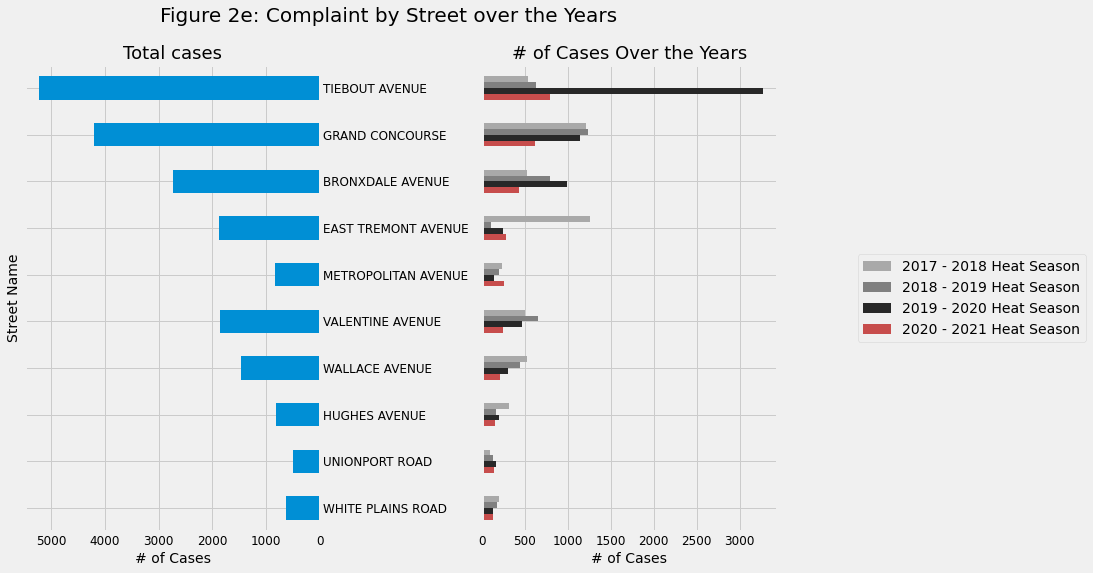

In [32]:
fig, ax = plt.subplots(ncols=2, sharey = True)

df_merge_street['sum'].plot.barh(ax=ax[0])
ax[0].yaxis.tick_right()
ax[0].invert_xaxis()
ax[0].set_title("Total cases", fontsize=18)
ax[0].set_xlabel('# of Cases')
ax[0].set_ylabel('Street Name')


df_merge_street.drop(columns='sum').plot.barh(ax=ax[1], color=clrs_r[1:5])
ax[1].set_title("# of Cases Over the Years", fontsize=18)

ax[0].invert_yaxis()


fig.subplots_adjust(wspace=0.55)

plt.legend(labels = df_merge_street.columns, loc='center left', bbox_to_anchor = (1.25, 0.5), ncol=1)
plt.suptitle('Figure 2e: Complaint by Street over the Years', fontsize=20)
plt.xlabel('# of Cases')
plt.ylabel('Street Name')
plt.show()

Above plot only shows the Top 10 most complaint street in 2020 - 2021 Heat Season since it is what we are most interested in for now. <br>
#### 2.3 The **Major Findings** are: <br>
1. The Top 3 most complaint street are: **TIEBOUT AVENUE, GRAND CONCOURSE, BRONXDALE AVENUE**. <br>
2. People living in *TIEBOUT AVENUE* contributed over 3,000 complaints in 2019-2020 Heat Season. <br>
3. Cases from *GRAND CONCOURSE* remain constant over the year at approximately 1200 cases. <br>
4. People living in *BRONXDALE AVENUE* have increasingly complaint about HEAT/HOT WATER matter. <br>
In short, the streets to be foused on should be: *TIEBOUT AVENUE, GRAND CONCOURSE, BRONXDALE AVENUE*.  

### The Answer to Question 2: <br>
HEAT/HOT WATER is always an issue since 2014 in all borough. <br>
**BRONX**, the *forth* populated borough lodged the *most* complaints. <br>
Should the main foucs at the time be **BRONX**, escpecially on zip codes **10457, 10458, 10462, 10467, 10468**. <br>
While focusing on the aforementioned zip codes, pay more attention to the street named: **TIEBOUT AVENUE, GRAND CONCOURSE** and **BRONXDALE AVENUE**.

# Question 3 - What Is the Relationship between Housing Characteristics and Complaints?
*(eg. Address, BldgArea, BldgDepth, BuiltFAR, CommFAR, FacilFAR, Lot, LotArea, LotDepth, NumBldgs, NumFloors, OfficeArea, ResArea, ResidFAR, RetailArea, YearBuilt, YearAlter1, ZipCode, YCoord, and XCoord)* <br>
Continued from **Question 2**, **BRONX** should be the main focus.
This question can be answered by: <br>
1. visualing the matrices of correlation between Number of Cases and different building characteristics. <br>
2. visualing the impact of the most impactful building characteristic on the number of cases. <br>

#### Import Data Set
Current data set has no above mentioned attributes. PLUTO data set is imported.

In [33]:
#unzip from downloaded file (from PLUTO)
df_bx = pd.read_csv(r'C:\Users\User\Downloads/BX_18v1.csv')

#As recommended, bx stands for Bronx
df_bx = df_bx[['Address', 'BldgArea', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']]

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [34]:
df_bx.head(5)

,Address,BldgArea,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,122 BRUCKNER BOULEVARD,0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0
1,126 BRUCKNER BOULEVARD,752,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0
2,138 BRUCKNER BOULEVARD,39375,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0
3,144 BRUCKNER BOULEVARD,12500,5.00,5.0,6.5,17,2500,100.0,1,5.0,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0
4,148 BRUCKNER BOULEVARD,8595,4.58,5.0,6.5,18,1875,75.0,1,5.0,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0


## Data Dictionary:
Can be retrieved from: <br>https://www1.nyc.gov/assets/planning/download/pdf/data-maps/open-data/pluto_datadictionary.pdf?r=20v8 <br>
**Address**: The building's address. <br>
**BldgDepth**: The building’s depth, which is the effective perpendicular distance, measured in feet.<br>
**BuiltFAR**: The BUILT FLOOR AREA RATIO is the total building floor area divided by the area of the tax lot.<br>
**CommFAR**: The maximum allowable commercial floor area ratio, based on the zoning district classification occupying the greatest percentage of the tax lot’s area as reported in ZoneDist1. <br>
**FacilFAR**:  The maximum allowable community facility floor area ratio, based on the zoning district classification occupying the greatest percentage of the tax lot’s area as reported in ZoneDist1.<br>
**Lot**: The number of the tax lot.<br>
**LotArea**: Total area of the tax lot, expressed in square feet rounded to the nearest integer.<br>
**LotDepth**: The tax lot's depth measured in feet.<br>
**NumBldgs**: The number of buildings on the tax lot.<br>
**NumFloors**: The number of full and partial stories starting from the ground floor, for the tallest building on the tax lot.<br>
**OfficeArea**: An estimate of the exterior dimensions of the portion of the structure(s) allocated for office use.<br>
**ResArea**: An estimate of the exterior dimensions of the portion of the structure(s) allocated for residential use.<br>
**ResidFAR**: The maximum allowable residential floor area ratio, based on the zoning district classification occupying the greatest percentage of the tax lot’s area as reported in ZoneDist1.<br>
**RetailArea**: An estimate of the exterior dimensions of the portion of the structure(s) allocated for retail use.<br>
**YearBuilt**: The year construction of the building was completed.<br>
**YearAlter1**: If a building has only been altered once, YEAR ALTERED 1 is the date that alteration began.<br>
**ZipCode**:A ZIP code that is valid for one of the addresses assigned to the tax lot.<br>
**YCoord**: The Y coordinate of the XY coordinate pair which depicts the approximate location of the lot. The XY coordinates are expressed in the New YorkLong Island State Plane coordinate system<br>
**XCoord**: The X coordinate of the XY coordinate pair which depicts the approximate location of the lot. The XY coordinates are expressed in the New YorkLong Island State Plane coordinate system<br>

### Merge Data Sets
Merge Two aforementioned datasets.

In [35]:
#df filtered by complaint_type, borough
df_hhw_bx = df.copy()

mask = (df_hhw_bx['complaint_type'] == 'HEAT/HOT WATER') & (df_hhw_bx['borough'] == 'BRONX')

df_hhw_bx = df_hhw_bx.loc[mask]

#.value_counts for each address

df_hhw_bx_inc = df_hhw_bx['incident_address']
df_hhw_bx_inc = df_hhw_bx_inc.value_counts()
df_hhw_bx_inc = df_hhw_bx_inc.to_frame()
df_hhw_bx_inc = df_hhw_bx_inc.reset_index()
df_hhw_bx_inc = df_hhw_bx_inc.rename(columns={'index':'inc_adrress','incident_address':'# of Cases'})

#merge
df_hhw_bx_inc = pd.merge(left=df_hhw_bx_inc, right=df_bx, how='left', left_on='inc_adrress', right_on='Address')
df_hhw_bx_inc.dropna(axis=0,inplace=True)
df_hhw_bx_inc.drop(columns={'inc_adrress'}, inplace=True, axis=0)

## 3.1 Correlation
Find the correlation between # of cases and Building Characteristics by applying .corr()<br>

https://www.statology.org/how-to-read-a-correlation-matrix/ <br>
The output usually has a value between -1 and 1 where: <br>


-1 indicates a perfectly negative linear correlation between two variables. <br>
0 indicates no linear correlation between two variables. <br>
1 indicates a perfectly positive linear correlation between two variables. <br>


In [36]:
df_hhw_bx_inc_corr = df_hhw_bx_inc.corr()

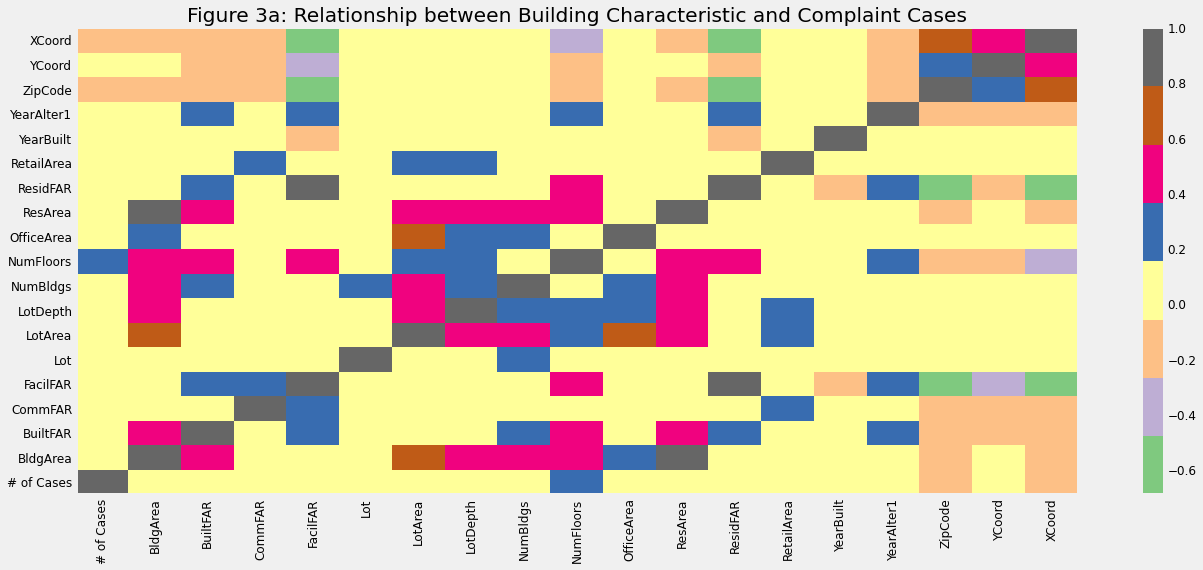

In [37]:
#Visualise correlation
import numpy as np
fig, ax= plt.subplots()
im = ax.pcolor(df_hhw_bx_inc_corr, cmap='Accent')
fig.set_figheight(8)
fig.set_figwidth(20)

#label names
row_labels = df_hhw_bx_inc_corr.columns
col_labels = df_hhw_bx_inc_corr.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_hhw_bx_inc_corr.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_hhw_bx_inc_corr.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.title('Figure 3a: Relationship between Building Characteristic and Complaint Cases')

plt.show()

#### 3.1 The **Major Findings** are: <br>
1. The most impactful characteristics are: **NumFloors, XCoord** and **Zipcode**. 
2. Most of the correlation value range between -0.2 to 0.2 which indicates that the relationship between buidling charatertistics and # of Cases is relatively weak.


## 3.2 Impact
From 3.1, the most impactful characteristics are BldgDepth, NumFloors, XCoord and Zipcode. <br>
**Zip Codes** has been proved to be "impactful" as it is one of the interests in Question 2. <br>
**XCoord**, together with YCoord are highly dependent to a specific address(building). <br>

In [38]:
#df for visualisation
df_hhw_bx_merged = pd.merge(left=df_hhw_bx, right=df_bx, how='left', left_on='incident_address', right_on='Address')

df_zipnf = df_hhw_bx_merged.copy()
df_zipnf['count'] = df_zipnf['NumFloors'].count()
df_zipnf = df_zipnf[['ZipCode','NumFloors','count']]
df_zipnf = df_zipnf.groupby(['ZipCode','NumFloors'], as_index=False).count()
df_zipnf = df_zipnf.pivot(index= 'NumFloors', columns='ZipCode')
df_zipnf = df_zipnf.fillna(0)

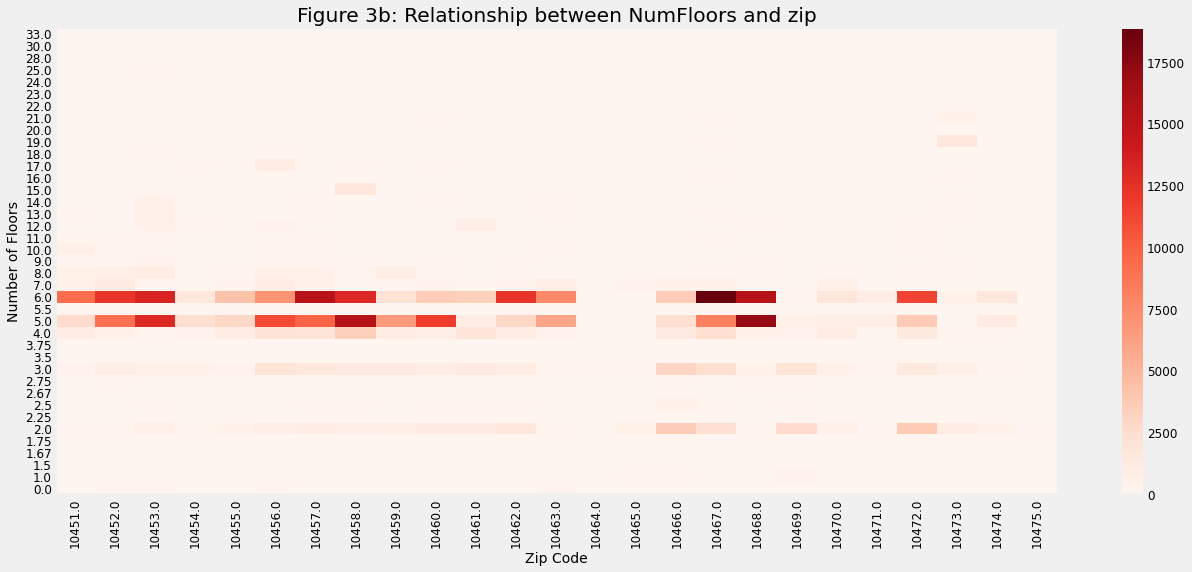

In [39]:
import numpy as np
fig, ax = plt.subplots()
im = ax.pcolor(df_zipnf, cmap='Reds')
fig.set_figheight(8)
fig.set_figwidth(20)

#label names
row_labels = df_zipnf.columns.levels[1]
col_labels = df_zipnf.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_zipnf.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_zipnf.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.title('Figure 3b: Relationship between NumFloors and zip')
plt.xlabel('Zip Code')
plt.ylabel('Number of Floors')
plt.show()

#### 3.2 The **Major Findings** are: <br>
1. Most Complaints Cases came from people who lives in building with **5** and **6 Floors** . 
2. Number of Cases are not evenly distributed among the Zip Codes. 

### The Answer to Question 3: <br>
The most impactful characteristics are: NumFloors, XCoord and Zipcode. <br>
XCoord and Zipcode are inter-related and zip codes have been proved to have different number of complaints. <br>
Most Complaints Cases came from people who lives in building with 5 and 6 Floors . <br>

# Question 4 - Predict Complaint Types
*From the visualisation in previous questions, all borough has the same trends. The data used to forecast here in Question 4 is the total number of HEAT/HOT WATER complaint cases over the years.*

Two types of forecasting methods are used: <br>
1. ARIMA 
2. fbProphet

Steps in both forecasting are similar:
1. Fitting the model
2. Validating the forecast
3. Producing and visualizing forecasts

More information can be found at: <br>
https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b


## 4.1 Forecast with ARIMA
ARIMA is one of the most commonly used method for time-series forecasting, stands for Autoregressive Integrated Moving Average. <br>
ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data. <br>

In [40]:
df_hhw = df_hhw.set_index('created_date')

In [41]:
df_hhw = df_hhw.resample('MS').sum()

In [42]:
import itertools
import statsmodels.api as sm

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [43]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_hhw,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1857.6888500489213
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1533.8449177186558
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1435.57404259254
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1178.1907422451477
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1449.2005208599942
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1424.680579012621
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1206.0761808327682
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1180.1798392354701
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1784.2944370591135
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1499.8995321927935
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1417.7924665350135
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1160.2664534554353
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1450.2860806776703
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1491.401909284631
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1208.275605773661
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1162.1393625303726
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1725.7613332328965
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1444.55602266638

The above output suggests that SARIMAX(0, 1, 1)x(1, 1, 1, 12) yields the lowest AIC value, an optimal option.

**Fitting the ARIMA model**

In [44]:
mod = sm.tsa.statespace.SARIMAX(df_hhw,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

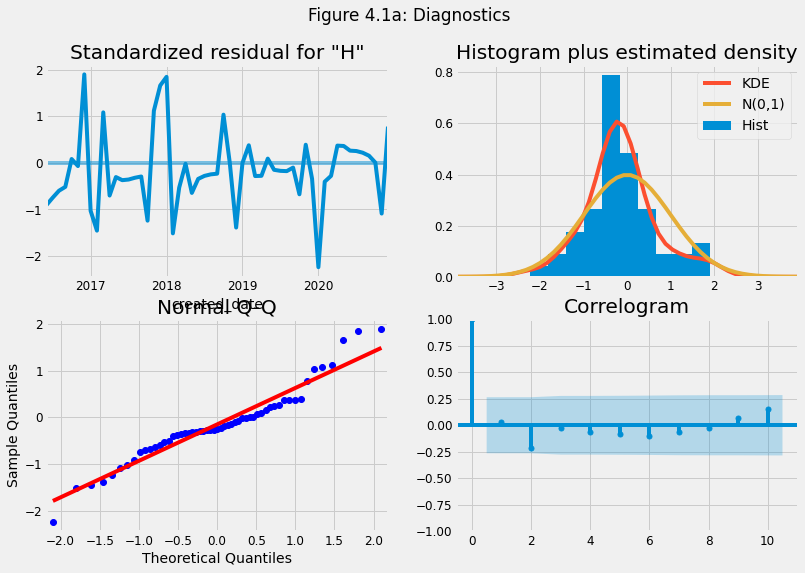

In [45]:
results.plot_diagnostics()
plt.suptitle('Figure 4.1a: Diagnostics')
plt.show()

It is not perfect, however, this model diagnostics suggests that the model residuals are near normally distributed.

**Validating forecasts**<br>
To understand the accuracy of the forecasts, predicted number of complaint cases is compared to the cases of the original data set, and the forecasts is set to start at 2017–01–01 to the end of the data.

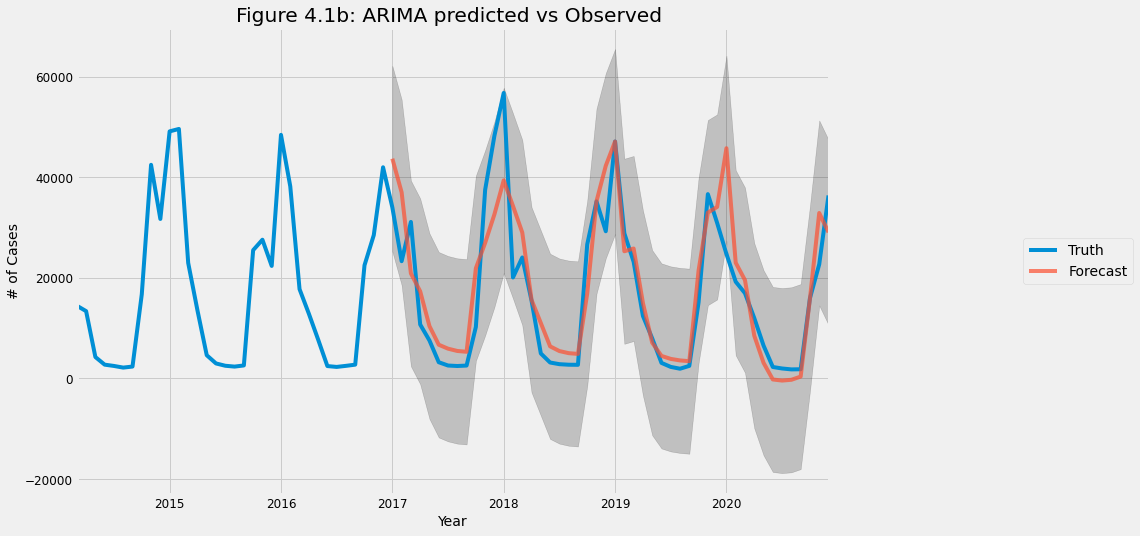

In [46]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df_hhw.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Year')
ax.set_ylabel('# of Cases')
plt.legend(labels = ('Truth', 'Forecast'), loc='center left', bbox_to_anchor = (1.25, 0.5), ncol=1)
plt.title('Figure 4.1b: ARIMA predicted vs Observed ')
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, the forecasts are align with the true values very well, showing an upward trend starts from the end of the year and captured the seasonality toward the *heat season (from October to May)*.

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
y_forecasted = pred.predicted_mean
y_truth = df_hhw['2017-01-01':]

print('RMSE = %.1f'  %np.sqrt(mean_squared_error(y_forecasted,  y_truth)))

RMSE = 7338.5


In statistics, Root Mean Square Error (RMSE) indicates that this model was able to forecast the monthly complaint cases in the test set within 7388 of the real number of cases. Knowing that the monthly complaint cases range from around 400 to over 40,000. In my opinion, this is a pretty good model so far.

**Producing and visualizing forecasts**

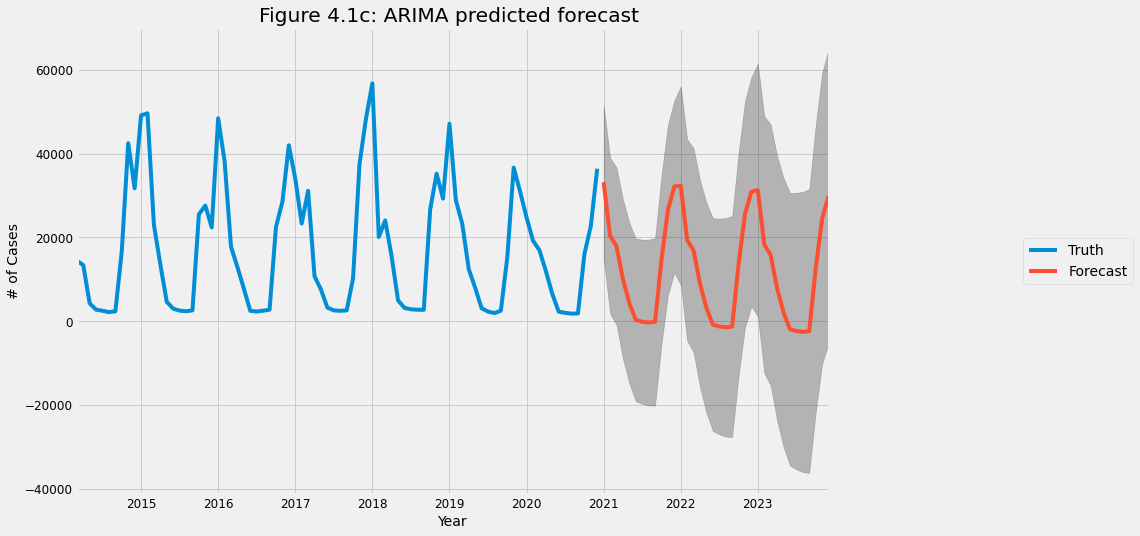

In [49]:
pred_uc = results.get_forecast(steps=36)
pred_ci = pred_uc.conf_int()
ax =  df_hhw.plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Year')
ax.set_ylabel('# of Cases')
plt.legend(labels = ('Truth', 'Forecast'), loc='center left', bbox_to_anchor = (1.25, 0.5), ncol=1)
plt.title('Figure 4.1c: ARIMA predicted forecast ')
plt.show()


This model clearly captured monthly complaint cases seasonality. However, as the forecast further out into the future, it is natural that the values to become less accurate (eg. the lowest total is decreasing below 0). 

## 4.2 Forecast with fbProphet
Released by Facebook in 2017, forecasting tool Prophet is designed for analyzing time-series that display patterns on different time scales such as yearly, weekly and daily. It also has advanced capabilities for modeling the effects of holidays on a time-series and implementing custom changepoints. 

In [50]:
from fbprophet import Prophet

In [51]:
z = df_hhw
z = z.reset_index()
z.rename(columns={'created_date':'ds', 'HEAT/HOT WATER':'y'}, inplace=True)

**Fitting the Prophet model**

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(1.9750000000000014, 0.5, '# of Cases')

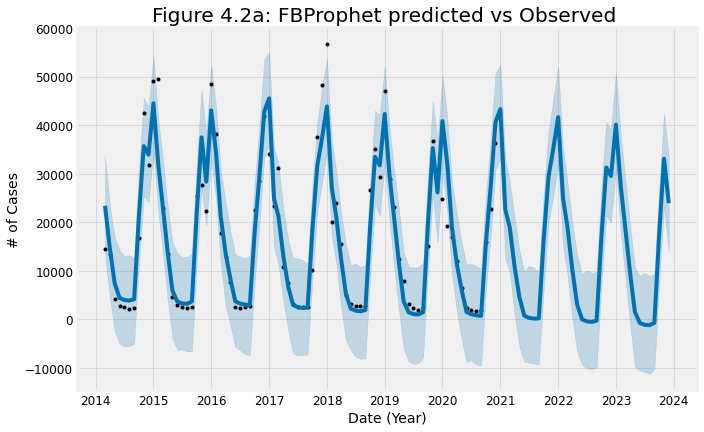

In [52]:
m = Prophet(interval_width=0.95)
m.fit(z)
future = m.make_future_dataframe(periods=36, freq='MS')
forecast = m.predict(future)
m.plot(forecast)


plt.title('Figure 4.2a: FBProphet predicted vs Observed ')
plt.xlabel('Date (Year)')
plt.ylabel('# of Cases')


In [53]:
y_forecasted = forecast['yhat'][0:48]
y_truth = df_hhw['2017-01-01':]

print('RMSE = %.1f'  %np.sqrt(mean_squared_error(y_forecasted,  y_truth)))

RMSE = 15741.6


**Producing and visualizing forecasts**

Text(0.5, 1.0, 'Figure 4.2c: Complaint Cases Estimate')

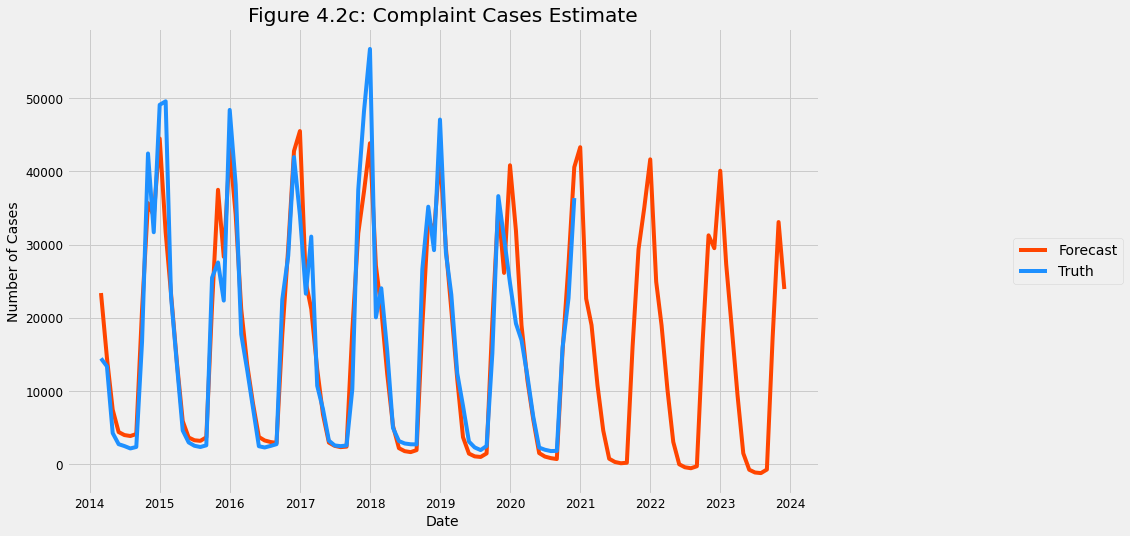

In [54]:
plt.plot(forecast['ds'], forecast['yhat'], 'orangered')
plt.plot(z['ds'], z['y'], 'dodgerblue')

plt.plot()
plt.legend(labels = ('Forecast', 'Truth'), loc='center left', bbox_to_anchor = (1.25, 0.5), ncol=1)
plt.xlabel('Date') 
plt.ylabel('Number of Cases')
plt.title('Figure 4.2c: Complaint Cases Estimate')


**Trends and Patterns**

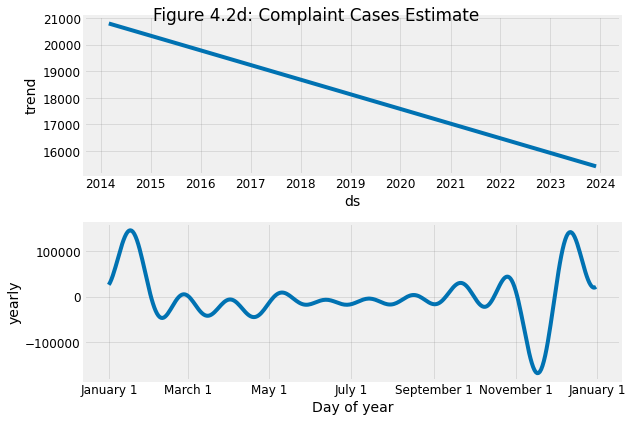

In [55]:
m.plot_components(forecast)
plt.suptitle('Figure 4.2d: Complaint Cases Estimate')
plt.show()

### The Answer to Question 4: <br>
Though having different RMSE, approximately 7000 (ARIMA) and 15000 (fbPRophet), both forecasts from both method show a declining trend. <br>

# Conclusion
By answering all the questions in Problem Statement, the main concern of HPD is identified to be the HEAT/ HOT WATER problem, most of the complaint cases are contributed by people living in Bronx and Brooklyn Boroughs. Considering the population of Bronx (1.6million), it lodged the number of complaint cases (70,000 cases), eventually the same as Brooklyn, the borough with a population of 2.5million. Thus, HPD should focus more on the Bronx, especially the following Zip Codes, 10457, 10458, 10462, 10467, 10468. Focusing on the zip codes, Tiebout Avenue, Grand Concourse and Bronxdale Avenue are the Top 3 most complaint streets. When diving into the correlation relationship between housing characteristics and the number of cases, the correlation value ranges between -0.2 to 0.2 which indicates that the relationship between them is relatively weak. However, it was proved that people living in accommodation with the number of floors of 5 and 6 complaint the most. Lastly, when forecasting the future number of cases, both ARIMA and fbProphet showed a declining trend. This could be a heartwarming outcome of the effort of HPD because they have already started to access complainants’ apartments since the heat season 2018. Even in the height of the local COVID-19 outbreak, the inspectors are still on their duty and have conducted over 100,000 heat and hot water inspections. However, increasing effort should be given as there are still people suffering in the cold during heat season, especially in the COVID-19 pandemic. Thanks for reading and stay safe.